# 01. OpenCV 기초 및 이미지 처리 개념

## 01-2. OpenCV의 역할과 기본 기능
OpenCV(Open Source Computer Vision Library)는 실시간 컴퓨터 비전 작업을 수행하는 데 사용되는 오픈소스 라이브러리입니다. OpenCV는 다양한 영상 처리 및 컴퓨터 비전 기능을 제공하며, 라즈베리파이에서도 경량화된 환경에서 실행할 수 있습니다.

### OpenCV의 주요 기능
- 이미지 및 영상 처리 (색상 변환, 필터링, 기하학적 변환 등)
- 객체 탐지 및 추적 (얼굴, 눈, 사람 인식 등)
- 머신러닝 및 딥러닝 연동 (DNN, Haar Cascade, TensorFlow 지원)
- 카메라 및 비디오 스트리밍 처리

## 01-3. 영상 처리의 핵심 개념
컴퓨터 비전에서 영상 처리는 가장 기본적인 기술이며, 주요 개념은 다음과 같습니다.

### 1. 필터링 (Filtering)
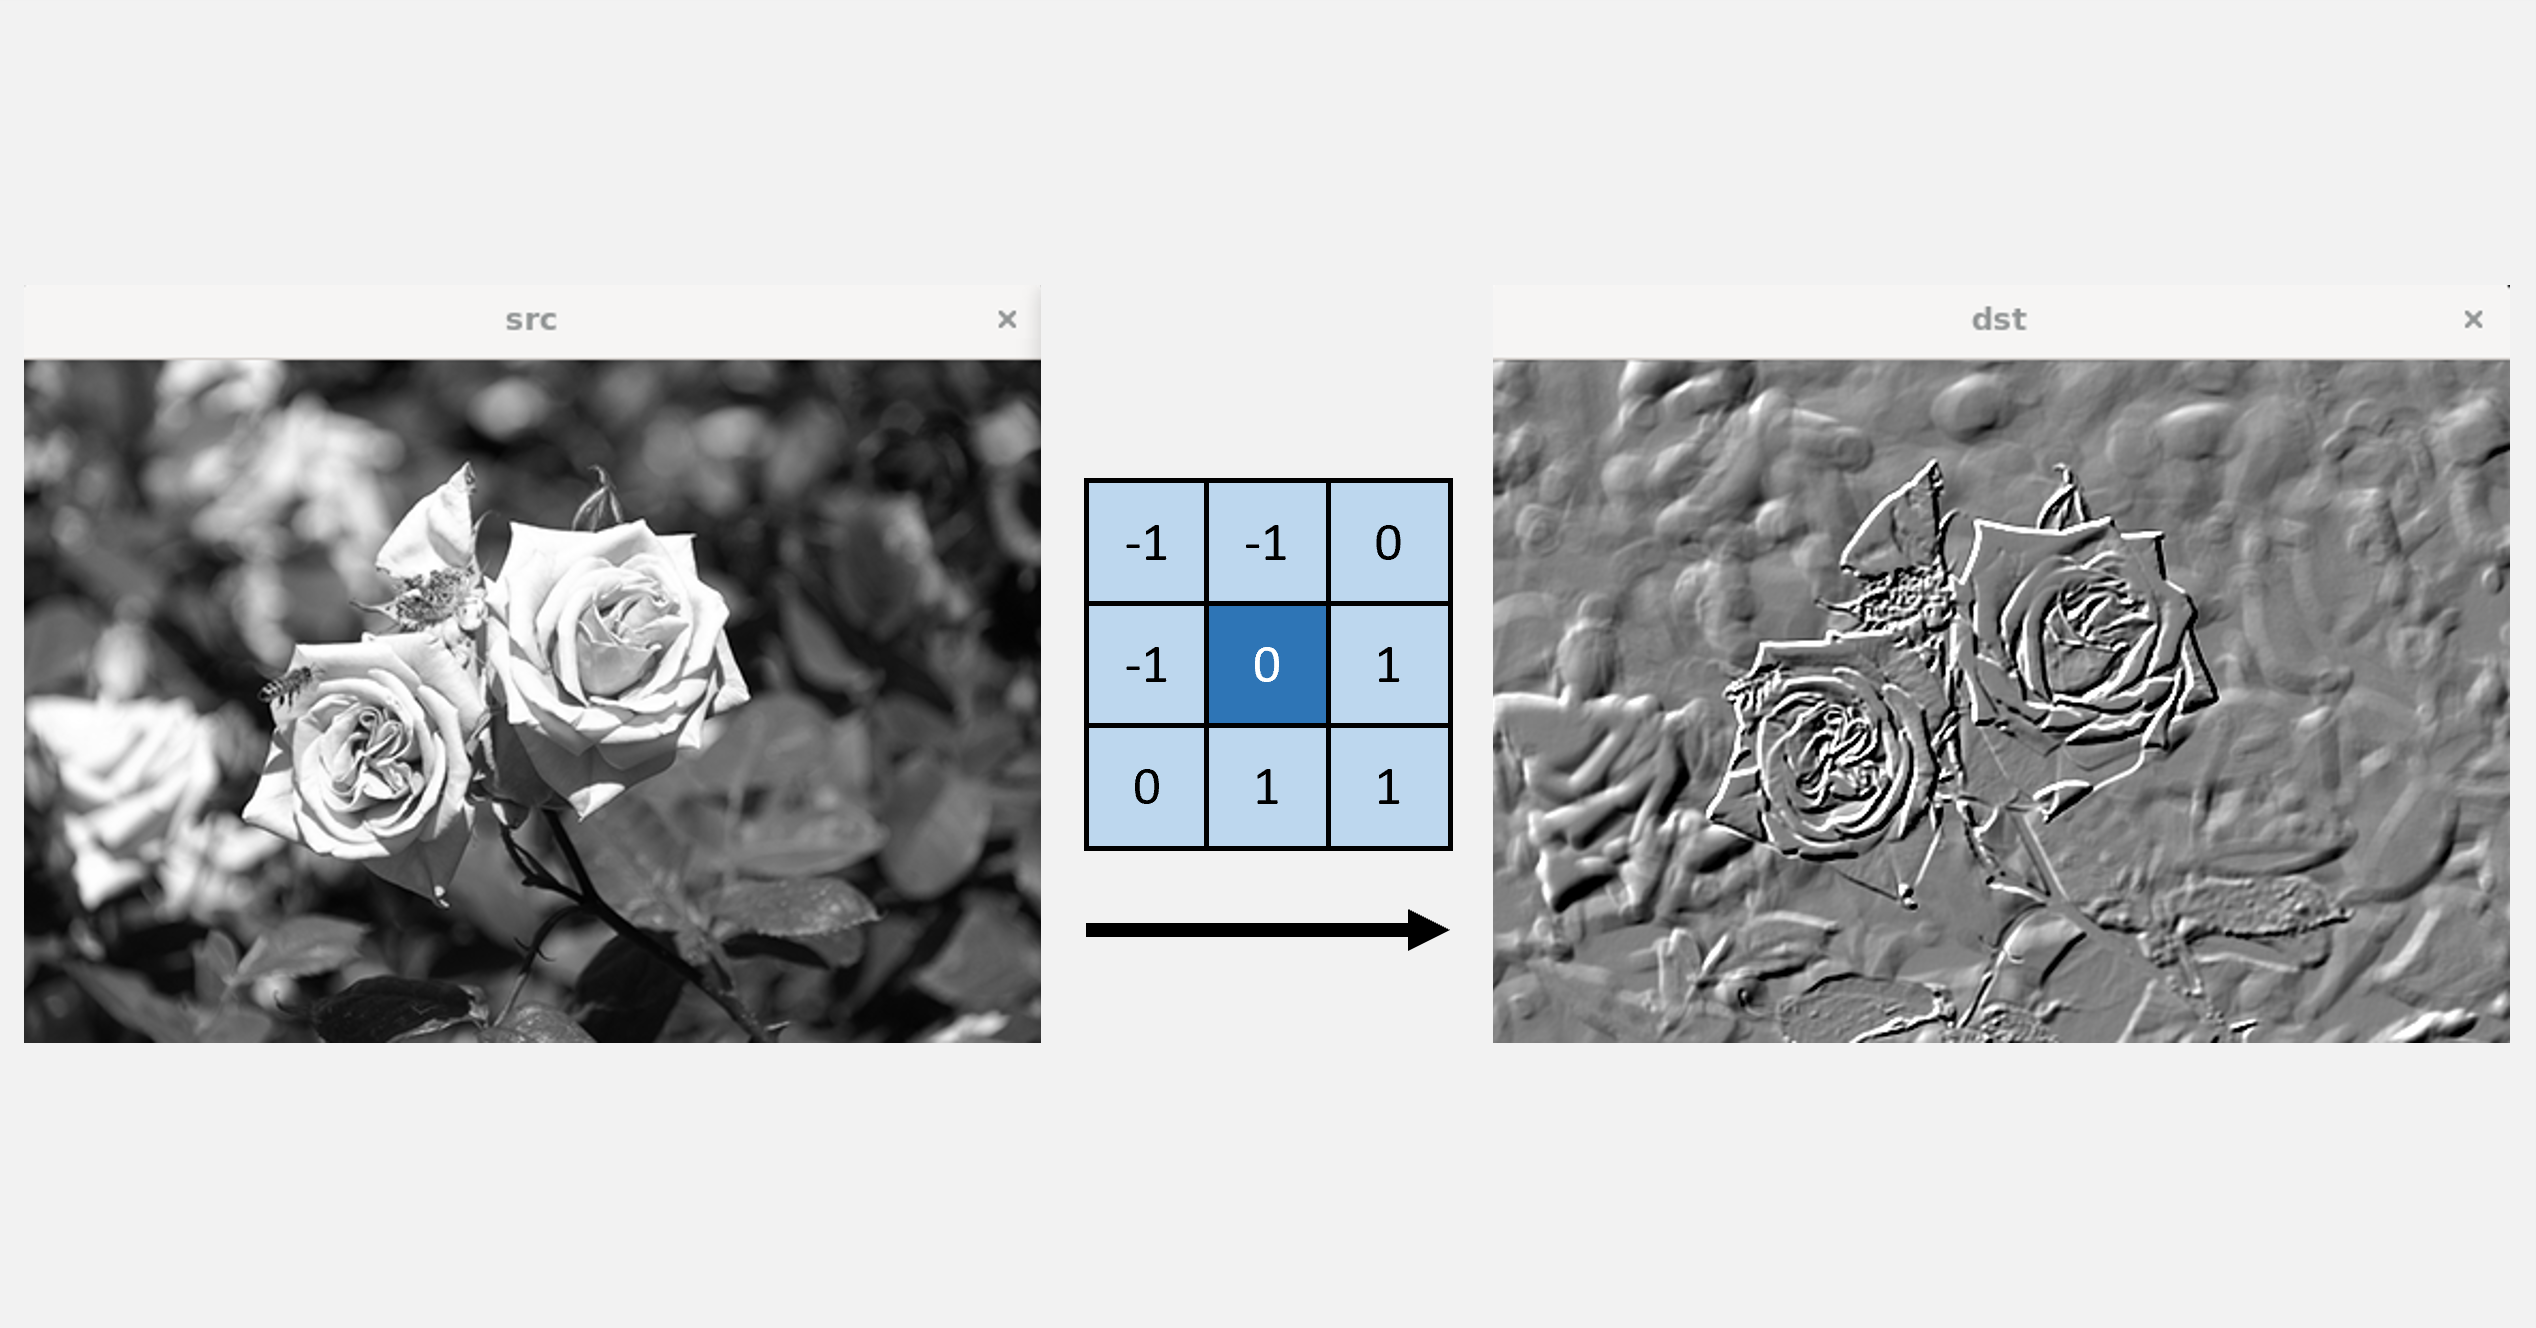
필터링은 이미지에서 노이즈를 제거하거나 특정 특징을 강조하는 기법입니다.
- **평균 블러링 (Averaging Blur)**: 이미지에서 픽셀 값을 평균 내어 부드럽게 만듦.
- **가우시안 블러 (Gaussian Blur)**: 가우시안 함수를 사용하여 자연스러운 흐림 효과 적용.
- **미디언 필터 (Median Blur)**: 노이즈 제거에 효과적이며, 특히 염색소음(salt-and-pepper noise)에 강함.

### 2. 엣지 검출 (Edge Detection)
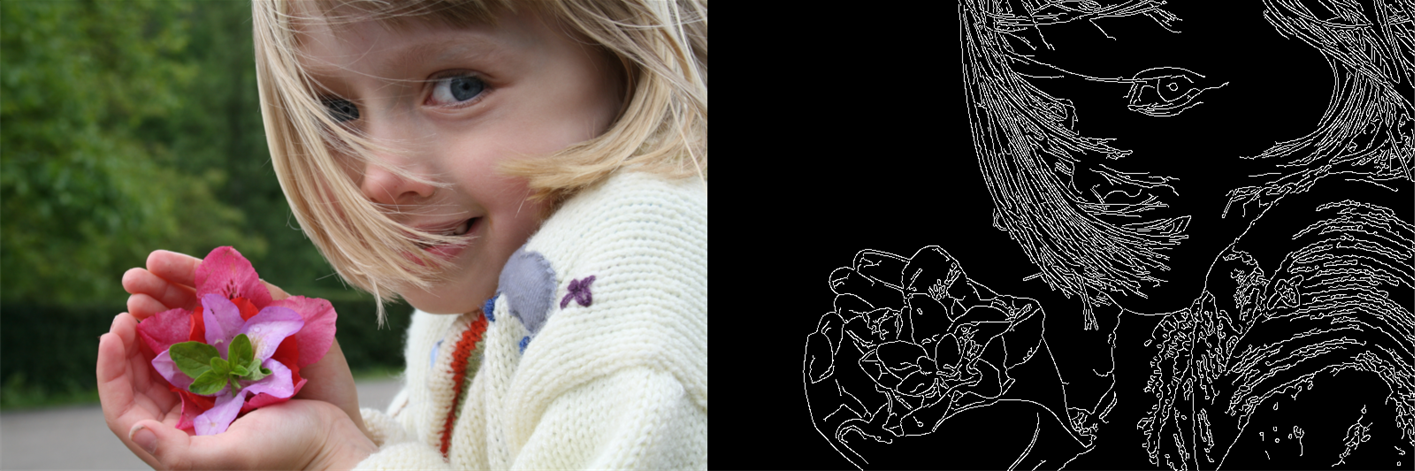
엣지 검출은 이미지 내 경계를 찾아내는 기법으로, 가장 많이 사용되는 방법은 Canny Edge Detection입니다.
- **Sobel 필터**: 미분 연산을 통해 엣지를 강조.
- **Laplacian 필터**: 2차 미분 연산을 통해 강한 엣지를 감지.
- **Canny 엣지 검출**: 노이즈 제거, 그라디언트 연산, 이중 임곗값 적용을 통해 엣지를 검출하는 알고리즘.

---

# 02. [실습 2] OpenCV로 실시간 카메라 스트리밍

### 목표
OpenCV를 사용하여 실시간으로 카메라 영상을 출력하고, 기본적인 영상 필터를 적용하여 실시간 영상 처리 기법을 익힌다.

### 실습 내용
1. OpenCV를 이용해 카메라에서 실시간 영상 출력
2. 이미지 필터 적용 (GrayScale, Canny Edge Detection)
3. 라즈베리파이에서 프레임 속도 확인 및 최적화

## 02-2. OpenCV를 이용해 카메라에서 실시간 영상 출력
라즈베리파이의 카메라 모듈을 사용하여 OpenCV를 통해 실시간 영상 스트리밍을 구현합니다.

In [ ]:
import cv2

# 카메라 열기
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    cv2.imshow('Live Stream', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'): # q를 누르면 종료
        break

cap.release()
cv2.destroyAllWindows()

## 02-3. 이미지 필터 적용 (GrayScale, Canny Edge Detection)
영상 처리에서 가장 기본적인 필터링 기법을 적용해봅니다.

In [ ]:
import cv2

# 카메라 열기
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # 그레이스케일 변환
    edges = cv2.Canny(gray, 100, 200)  # Canny 엣지 검출
    
    cv2.imshow('Gray Video', gray)
    cv2.imshow('Canny Edge Video', edges)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

## 02-4. 라즈베리파이에서 프레임 속도 확인 및 최적화
라즈베리파이에서 OpenCV 영상 처리 성능을 최적화하기 위해 프레임 속도를 측정하고 조정할 수 있습니다.

In [ ]:
import cv2
import time

# 카메라 열기
cap = cv2.VideoCapture(0)

prev_time = time.time()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    curr_time = time.time()
    fps = 1 / (curr_time - prev_time)
    prev_time = curr_time
    
    cv2.putText(frame, f'FPS: {int(fps)}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Live Stream with FPS', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 03. 얼굴 인식 기술 개요

## 03-2. 얼굴 검출과 인식의 원리
얼굴 인식 기술은 크게 **얼굴 검출 (Face Detection)**과 **얼굴 인식 (Face Recognition)**으로 나뉩니다.
- **얼굴 검출 (Face Detection)**: 이미지 또는 영상에서 얼굴을 찾아내는 기술.
- **얼굴 인식 (Face Recognition)**: 감지된 얼굴이 누구인지 판별하는 기술.

## 03-3. 다양한 얼굴 인식 알고리즘
1. **Haar Cascade**: 머신러닝 기반 기법으로, 특징 벡터를 이용해 얼굴을 감지함.
2. **DNN (Deep Neural Networks)**: 딥러닝을 활용한 보다 정밀한 얼굴 검출 및 인식 모델.

---

# 04. [실습 3] 얼굴 인식 시스템 만들기
### 목표
OpenCV에서 제공하는 Haar Cascade 및 DNN을 활용하여 얼굴을 감지하고, 실시간 영상에서 얼굴을 인식하는 기능을 구현한다.

### 실습 내용
1. Haar Cascade를 활용한 얼굴 감지
2. OpenCV DNN을 활용한 실시간 얼굴 인식
3. 카메라로 얼굴을 인식하면 박스를 그리는 기능 추가

## 04-2. Haar Cascade를 활용한 얼굴 감지
OpenCV에서 제공하는 **Haar Cascade Classifier**를 활용하여 얼굴을 감지합니다.

In [ ]:
import cv2

# 카메라 열기
cap = cv2.VideoCapture(0)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    cv2.imshow('Face Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break